In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\Lenovo\\IVY Python ML-Oct 2022'

In [3]:
os.chdir('C:/Users/Lenovo/ALL Python ML notebooks/Machine Predictive Maintenance Classification')

In [4]:
os.getcwd()

'C:\\Users\\Lenovo\\ALL Python ML notebooks\\Machine Predictive Maintenance Classification'

# Machine Predictive Maintenance Classification

Since real predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish,
we present and provide a synthetic dataset that reflects real predictive maintenance encountered in the industry to the
best of our knowledge.

The dataset consists of 10,000 data points stored as rows with 14 features in columns

- <b>UID</b>: unique identifier ranging from 1 to 10000
- <b>ProductID</b>: consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as
product quality variants and a variant-specific serial number
- <b>Air temperature [K]</b>: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
- <b>Process temperature [K]</b>: generated using a random walk process normalized to a standard deviation of 1 K,
added to the air temperature plus 10 K
- <b>Rotational speed [rpm]</b>: calculated from powepower of 2860 W, overlaid with a normally distributed noise
- <b>Torque [Nm]</b>: torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values
- <b>Tool wear [min]</b>: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a
'machine failure' label that indicates, whether the machine has failed in this particular data point for any of the
following failure modes are true

# Important : There are two Targets - Do not make the mistake of using one of them as feature, as it will lead to leakage. But here we are considering only one target i.e, "Failure Type"

- <b>Target</b> : Failure or Not
- <b>Failure Type</b> : Type of Failure

# Reading the data into python

This is one of the most important steps in machine learning! You must understand the data and the domain well before
trying to apply any machine learning algorithm.

The data has one file "predictive_maintenance.csv". This file contains 10000 readings.

In [13]:
import sys

In [14]:
sys.version

'3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]'

In [15]:
# Suppressing the warnings messages
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Reading the dataset
import pandas as pd
import numpy as np
PredictiveMaintenance=pd.read_csv('C:/Users/Lenovo/ALL Python ML notebooks/Machine Predictive Maintenance Classification/predictive_maintenance.csv', encoding='latin')
print('Shape before deleting duplicate values', PredictiveMaintenance.shape)

# Removing duplicates rows if any
PredictiveMaintenance=PredictiveMaintenance.drop_duplicates()
print('Shape after deleting duplicate values', PredictiveMaintenance.shape)

PredictiveMaintenance['Failure Type'].replace({'No Failure':0,'Heat Dissipation Failure':1, 'Overstrain Failure':2, 'Power Failure':3, 'Random Failures':4, 'Tool Wear Failure':5}, inplace=True)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
PredictiveMaintenance.head()

Shape before deleting duplicate values (10000, 10)
Shape after deleting duplicate values (10000, 10)


,ï»¿UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0


# Defining the problem statement:

Create a predictive maintenance whether the machine is undergoing failure or not
* Target Variable-Target
* Predictors: Type, Air temperature, Process temperature, Rotational Speed, Torque, Tool wear etc
    
* Target=0 No Failure, 
* Target=1 Failure(Any)

# Determine the type of Machine Learning

Based on the problem statement you can understand that we need to create a supervised ML classification model, as the target variable is categorical.

# Looking at the distribution of the Target variable

* If target variable's distribution is too skewed then the predictive modeling will not be possible
* Bell curve is desirable but slightly positive skew or negative skew is also fine
* When performing Classification, make sure there is a balance in the the distribution of each class
otherwise it impacts the Machine Learning algorithms ability to learn all the classes

<Axes: xlabel='Failure Type'>

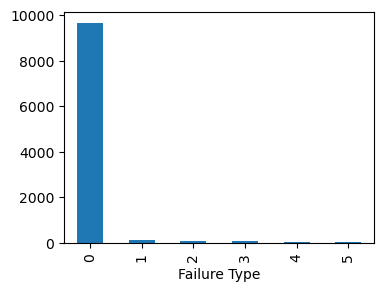

In [17]:
%matplotlib inline
# Creating Bar chart as Target variable is Categorical
GroupedData=PredictiveMaintenance.groupby('Failure Type').size()
GroupedData.plot(kind='bar', figsize=(4,3))

<Axes: xlabel='Target'>

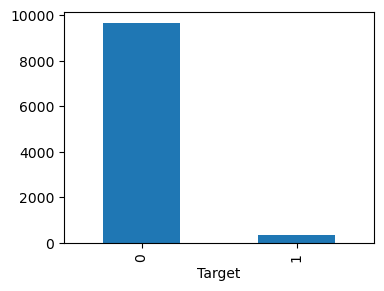

In [18]:
GroupedData=PredictiveMaintenance.groupby('Target').size()
GroupedData.plot(kind='bar', figsize=(4,3))

The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each category to learn from.

# Basic Data Exploration

This step is performed to gauge the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should bbe done to identify which columns are Quantitative, Categorical or Qualitative.

This step helps to start the columns rejection process. You must loo at each column carefully and ask, does this columns affect the values of the Target variable? For example, in this case study, you will ask, does this columns affect the machine failure?
If the answer is a clear "No", then remove the columns immediately from the data, otherwise keep the coluns for the further analysis.

There are four commands which are used for Basic data exploration in Python

* head() : This helps to see a few sample rows of the data
* info() : This provides the summarized information of the data
* describe() : This provides the descriptive statistical details of the data
* nunique(): This helps us to identify if a column is categorical or continuous

In [19]:
# looking at sample rows in the data
PredictiveMaintenance.head()

,ï»¿UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0


In [20]:
# Observing the summarized information of data
# Data types, missing values based on number of non-null values v/s total rows etc.
# Remove those variables from data which have too many missing values (Missing values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
PredictiveMaintenance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ï»¿UDI                   10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 781.4+ KB


In [21]:
# Looking at the descriptive statistics of the data
PredictiveMaintenance.describe(include='all')

,ï»¿UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
count,10000.00000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
unique,NaN,10000,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,M14860,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,NaN,NaN,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.085000
std,2886.89568,NaN,NaN,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.511861
min,1.00000,NaN,NaN,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000
25%,2500.75000,NaN,NaN,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000
50%,5000.50000,NaN,NaN,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000
75%,7500.25000,NaN,NaN,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000


In [22]:
# Finging unique values for each column
# To understand which column is categorical and which one is Continuous
# Typically if the number of unique values are < 20 then the variable is likely to be a category otherwise continuous
PredictiveMaintenance.nunique()

ï»¿UDI                     10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

# Basic Data Exploration Results

Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regaring each column. Hence, creating a initial roadmap for further analysis.

The selected columns in this step are not final, further study will be done and then a final list will be created

* <b>ï»¿UDI</b> : Rejected
* <b>Product ID</b> : Rejected
*<b>Type</b> : Selected
* <b>Air temperature [K]</b> : Selected
* <b>Process temperature [K]</b> : Selected
* <b>Rotational speed [rpm]</b> : Selected
* <b>Torque [Nm]</b> : Selected
* <b>Tool wear [min]</b> : Selected
* <b>Target</b> : Selected. <b>Target Variable</b>
* <b>Failure Type</b> : Selected. <b>Target Variable</b>

# Removing useless columns from the data

In [23]:
# Deleting those columns which are not useful in predictive analysis because theses variables are qualitative
UselessColumns = ['ï»¿UDI','Product ID']
PredictiveMaintenance = PredictiveMaintenance.drop(UselessColumns, axis=1)
PredictiveMaintenance.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0
2,L,298.1,308.5,1498,49.4,5,0,0
3,L,298.2,308.6,1433,39.5,7,0,0
4,L,298.2,308.7,1408,40.0,9,0,0


# Visual Exploratory Data Analysis

* Categorical variables: Bar plot
* Continuous variables: Histogram

### Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted five categorical predictors in the data

Categorical Predictors: 'Type', 'Target', 'Failure Type'

We use bar charts to see how the data is distributed for these categorical columns.

In [24]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# We are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))
    
    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar', ax=subPlot[plotNumber])

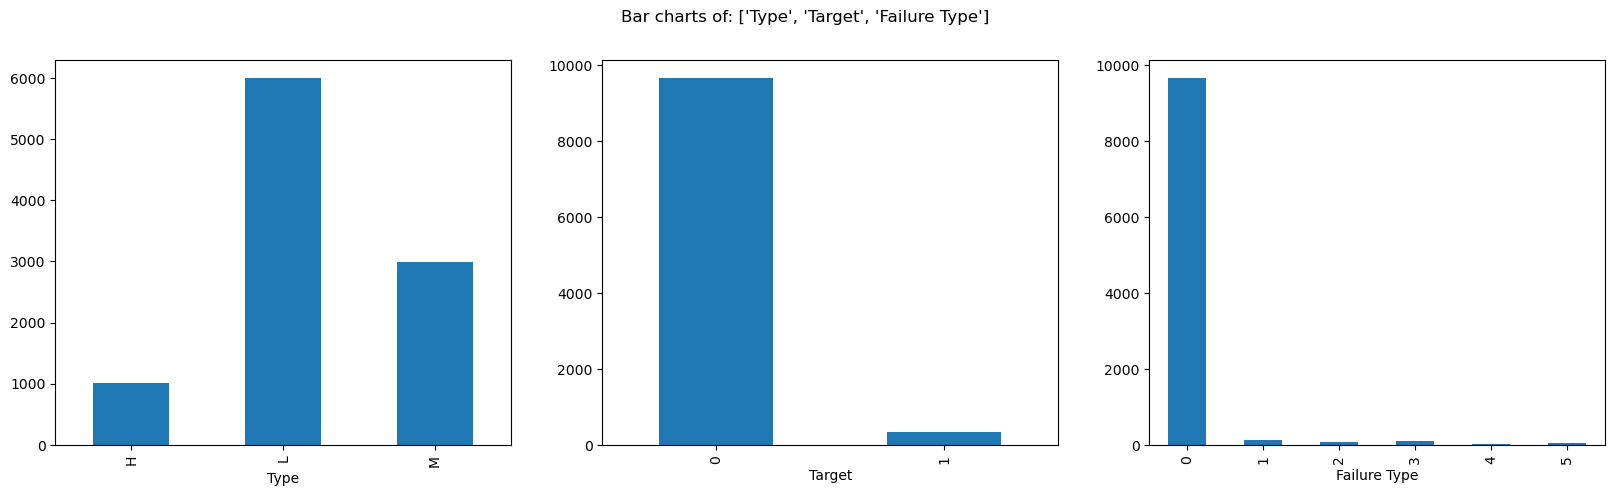

In [25]:
########################################################################
# Calling the function
PlotBarCharts(inpData=PredictiveMaintenance, colsToPlot=['Type', 'Target', 'Failure Type'])

## Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

In the ideal bar chart each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

In this data, all the categorical columns except have satisfactory distribution to be considered for machine learning.

<b>Selected Categorical Variables</b>: All the categorical variables are selected for further analysis.

'Type', 'Target', 'Failure Type'

### Visualize distribution of all the Continuous Predictor variables in the data using histograms
Based on the Basic Data Exploration, there are two continuous predictor variables 'Air temperature [K]','Process temperature [K]',
'Rotational speed [rpm]', 'Torque [Nm]' and 'Tool wear [min]'

### Plotting histograms of multiple columns together
Observe that Air temperature [K], Process temperature [K], Rotational speed [rpm], Torque [Nm] and Tool wear [min] has outliers

array([[<Axes: title={'center': 'Air temperature [K]'}>,
        <Axes: title={'center': 'Process temperature [K]'}>],
       [<Axes: title={'center': 'Rotational speed [rpm]'}>,
        <Axes: title={'center': 'Torque [Nm]'}>],
       [<Axes: title={'center': 'Tool wear [min]'}>, <Axes: >]],
      dtype=object)

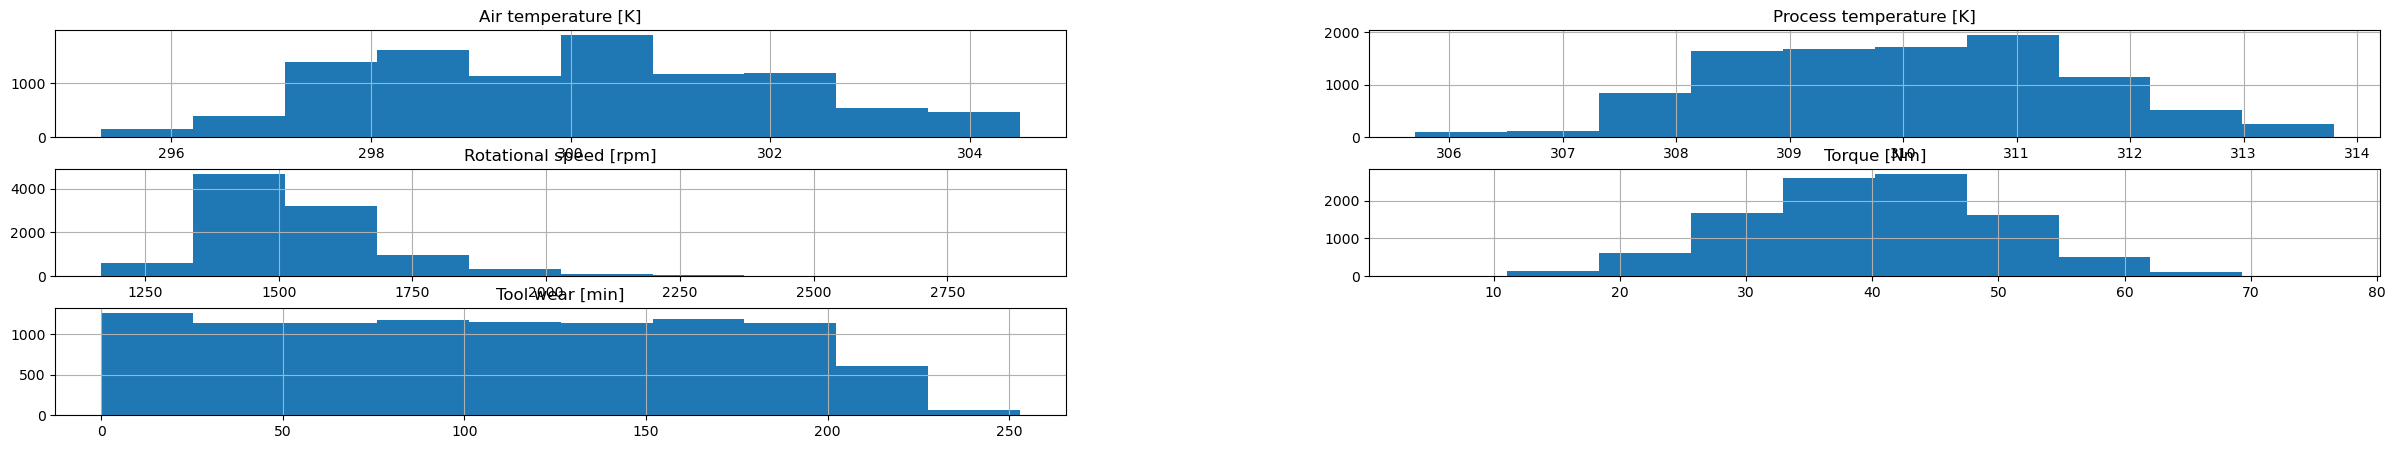

In [26]:
PredictiveMaintenance.hist(['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'], figsize=(30,5))

## Histogram Interpretation
Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range. For example, in the above histogram of "Age", there are around 175 rows in data that has a age between 20 to 30.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

<b>Selected Continuous Variables:</b>
* <b>Air temperature [K]</b> : Selected. The distribution is good.
* <b>Process temperature [K]</b>: Selected. The distribution is good.
* <b>Rotational speed [rpm]</b> : Selected. Outliers seen beyond 2500, need to treat them.
* <b>Torque [Nm]</b> : Selected. The distribution is good. Outliers seen beyond 70 and before 11, need to treat them
* <b>Tool wear [min]</b> : Selected. The distribution is good.

# Outlier treatment
Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

<b>Why I should treat the outliers?</b>

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data. 

* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value

Below we are finding out the most logical value to be replaced in place of outliers by looking at the histogram.

### Replacing outliers for 'Rotational speed [rpm]'

In [27]:
# Finding nearest values to 2250 mark
PredictiveMaintenance['Rotational speed [rpm]'][PredictiveMaintenance['Rotational speed [rpm]']>2500].sort_values(ascending=False)

1784    2886
463     2874
50      2861
847     2833
4296    2825
3369    2760
1391    2737
1095    2721
7997    2710
3867    2709
5334    2706
4302    2695
4048    2691
194     2678
4419    2676
3579    2672
4762    2663
4997    2659
5152    2643
3457    2639
6799    2636
9939    2636
7011    2633
8398    2617
6502    2595
7536    2579
1808    2567
380     2564
3140    2563
2233    2549
1209    2540
7086    2514
Name: Rotational speed [rpm], dtype: int64

Above result shows the nearest logical value is 2700, hence, replacing any value above 2500 with it.

In [28]:
# Replacing outliers with the nearest possible value
PredictiveMaintenance['Rotational speed [rpm]'][PredictiveMaintenance['Rotational speed [rpm]']>2500] = 2700

### Replacing outliers for 'Torque [Nm]

In [29]:
PredictiveMaintenance['Torque [Nm]'][PredictiveMaintenance['Torque [Nm]']<11].sort_values(ascending=False)

4419    10.8
194     10.7
5334     9.8
3867     9.7
7997     9.7
1095     9.3
1391     8.8
3369     8.0
4296     5.8
847      5.6
50       4.6
463      4.2
1784     3.8
Name: Torque [Nm], dtype: float64

In [30]:
PredictiveMaintenance['Torque [Nm]'][PredictiveMaintenance['Torque [Nm]']<11] = 7

In [31]:
PredictiveMaintenance['Torque [Nm]'][PredictiveMaintenance['Torque [Nm]']>69].sort_values(ascending=False)

7763    76.6
880     76.2
9084    75.4
1324    74.5
6525    73.6
3000    72.8
8582    72.0
7569    71.8
603     71.6
5615    71.3
4936    70.6
5394    70.5
5706    70.0
6612    70.0
8307    69.7
7280    69.6
4920    69.4
2125    69.4
1496    69.4
1144    69.1
Name: Torque [Nm], dtype: float64

In [32]:
PredictiveMaintenance['Torque [Nm]'][PredictiveMaintenance['Torque [Nm]']>69] = 72

# Visualizing distribution after outlier treatment
The distribution has improved after the outlier treatment. There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable.

array([[<Axes: title={'center': 'Rotational speed [rpm]'}>,
        <Axes: title={'center': 'Torque [Nm]'}>]], dtype=object)

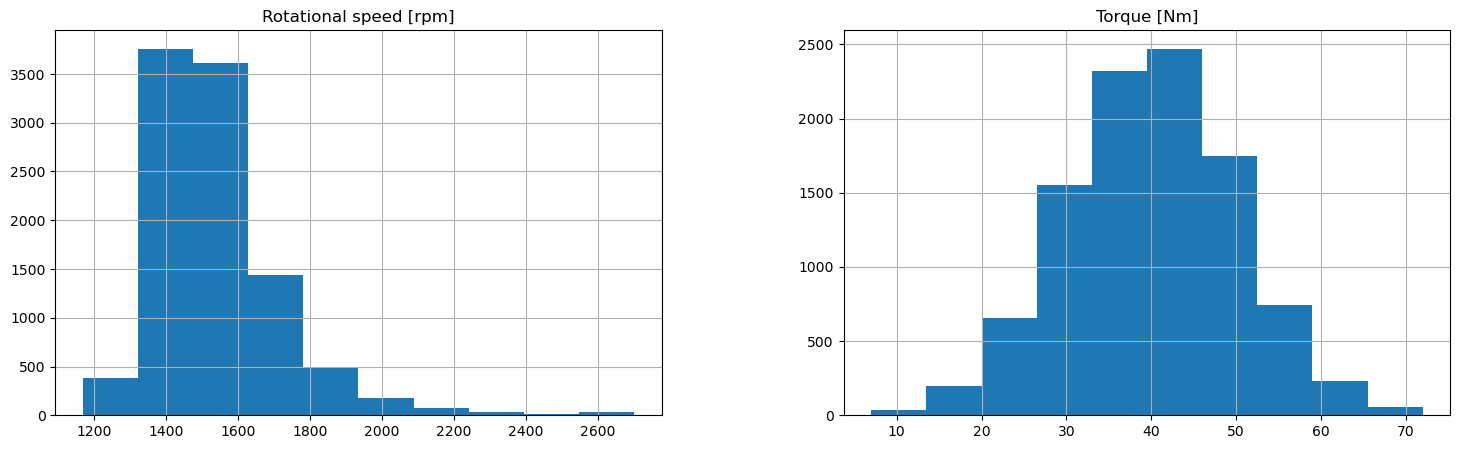

In [33]:
PredictiveMaintenance.hist(['Rotational speed [rpm]', 'Torque [Nm]'], figsize=(18,5))

# Missing values treatment
Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

* Delete the missing value rows if there are only few records
* Impute the missing values with MEDIAN value for continuous variables
* Impute the missing values with MODE value for categorical variables
* Interpolate the values based on nearby values
* Interpolate the values based on business logic

In [34]:
# Finding how many missing valus are there for each column
PredictiveMaintenance.isnull().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [35]:
# Create additional features here
# Feature engineering step like taking log/sqrt of variables

### Feature Selection

Now its time to finally choose the best columns (Features) which are correlated to the Target variable. This can be done directly measuring the correlation values or ANOVA/Chi-Square tests.
However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically

### Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots

## Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test


In this case study the Target variable is categorical, hence below two scenarios will be present
* Categorical Target Variable Vs Continuous Predictor
* Categorical Target Variable Vs Categorical Predictor

# Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Categorical and the predictor variable is Continuous we analyze the relation using bar plots/Boxplots and measure the strength of relation using Anova test

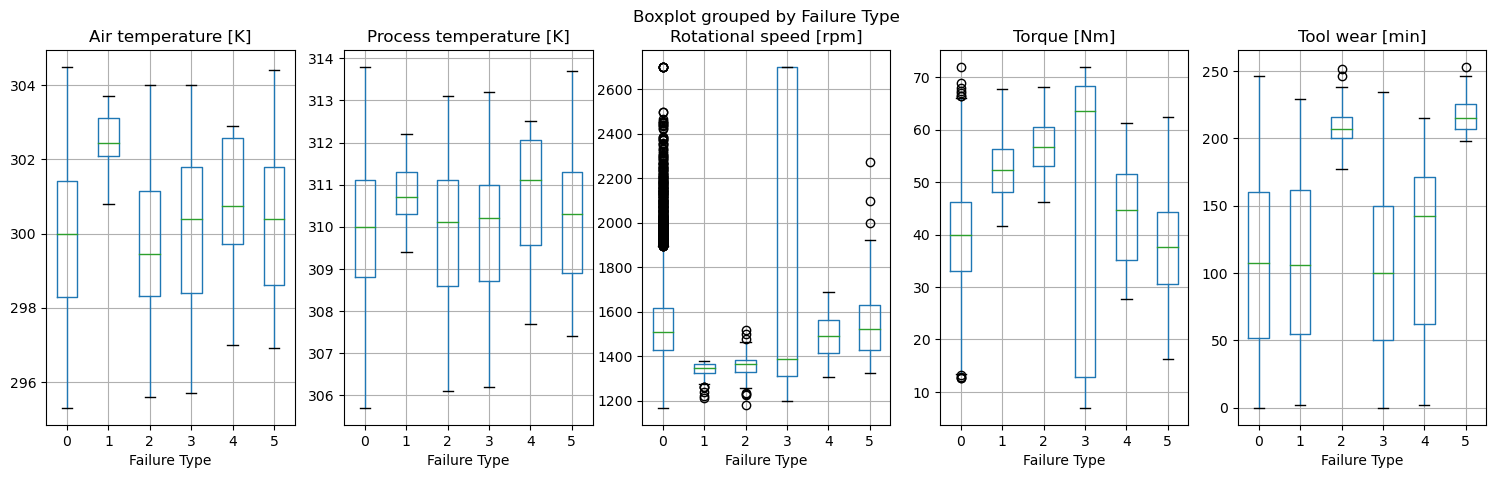

In [36]:
# Box plots for Categorical Target Variable "Failure Type" and continuous predictors
ContinuousColsList=['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target variable "Failure Type"
for PredictorCol, i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    PredictiveMaintenance.boxplot(column=PredictorCol, by='Failure Type', figsize=(5,5), vert=True, ax=PlotCanvas[i])

# Box-Plots interpretation
<b>What should you look for in these box plots? </b>

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the continuous variable has No effect on the target variable. Hence, the variables are not correlated to each other.

For example, look at the first chart "Air temperature [K]" Vs "Failure Type". The boxes are not in the same line!

The other charts also exhibit opposite characteristics. Means the data distribution is different(the boxes are not in same line!) for each category of survival. It hints that these variables might be correlated with Survived.

We confirm this by looking at the results of ANOVA test below

# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
* ANOVA Test result: Probability of H0 being true

In [37]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('###### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value', AnovaResults[1])
            
    return(SelectedPredictors)

In [38]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
FunctionAnova(inpData=PredictiveMaintenance, TargetVariable='Failure Type', ContinuousPredictorList=ContinuousVariables)

###### ANOVA Results ##### 

Air temperature [K] is correlated with Failure Type | P-Value: 1.3724531006331406e-39
Process temperature [K] is correlated with Failure Type | P-Value: 3.8651520600774773e-07
Rotational speed [rpm] is correlated with Failure Type | P-Value: 5.727984238794866e-81
Torque [Nm] is correlated with Failure Type | P-Value: 1.9334490951226976e-107
Tool wear [min] is correlated with Failure Type | P-Value: 2.508386406398055e-70


['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]']

The results of ANOVA confirm our visual analysis using box plots above.

Look at the P-Value of all the variables, these helps to increase the accuracy.

<b>Final selected Continuous columns:</b>

'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'

# Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts
When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them  visually using barplots and statistically using Chi-square test

In [40]:
# Cross tabulation between two categorical variables
CrossTabResult=pd.crosstab(index=PredictiveMaintenance['Type'], columns=PredictiveMaintenance['Failure Type'])
CrossTabResult

Failure Type,0,1,2,3,4,5
Type,,,,,,
H,979,8,1,5,4,6
L,5757,74,73,59,12,25
M,2916,30,4,31,2,14


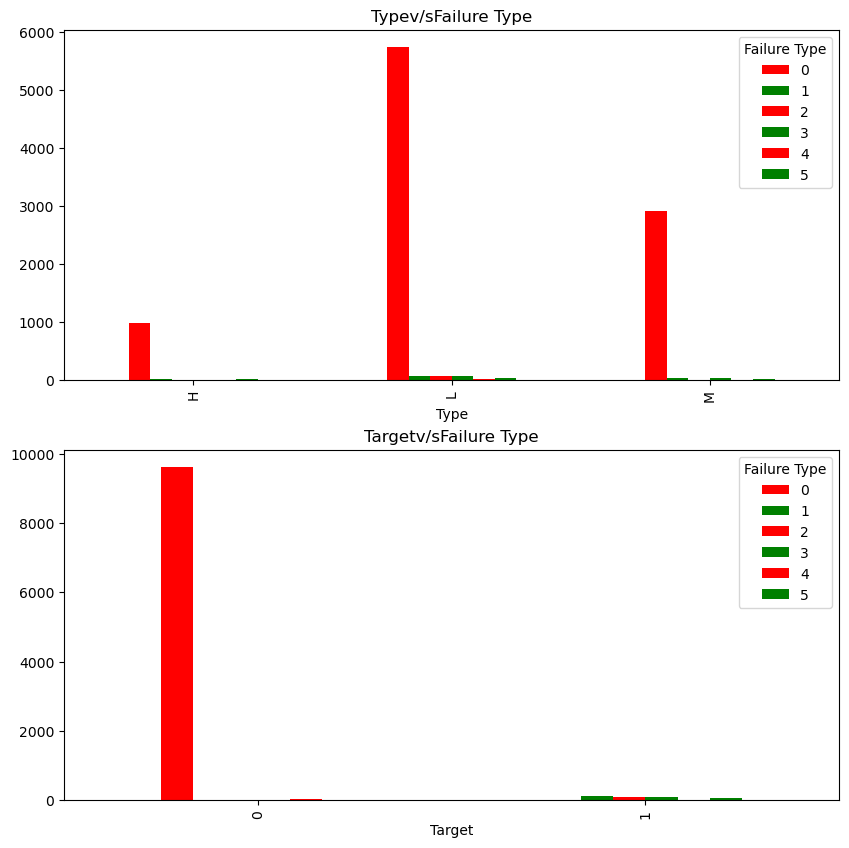

In [41]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=['Type', 'Target']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,10))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Failure Type"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=PredictiveMaintenance[CategoricalCol], columns=PredictiveMaintenance['Failure Type'])
    CrossTabResult.plot.bar(color=['red', 'green'], ax=PlotCanvas[i], title=CategoricalCol+'v/s'+'Failure Type')

# Grouped Bar charts Interpretation
<b>What to look for in these grouped bar charts?</b>

These grouped bar charts show the frequency in the Y-Axis and the category in the X-Axis. 
Column 'Target' is not take into account.

We confirm this analysis in below section by using Chi-Square Tests.

### Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

Chi-Square test is conducted to check the correlation between two categorical variables

* Assumption(H0): The two columns are NOT related to each other
* Result of Chi-Sq Test: The Probability of H0 being True

In [42]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            
    return(SelectedPredictors)

In [43]:
CategoricalVariables=['Type','Target']

# Calling the function
FunctionChisq(inpData=PredictiveMaintenance, 
              TargetVariable='Failure Type',
              CategoricalVariablesList= CategoricalVariables)

Type is correlated with Failure Type | P-Value: 8.570442384573702e-07
Target is correlated with Failure Type | P-Value: 0.0


['Type', 'Target']

# Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [44]:
SelectedColumns=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Selecting final columns
DataForML=PredictiveMaintenance[SelectedColumns]
DataForML.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,M,298.1,308.6,1551,42.8,0
1,L,298.2,308.7,1408,46.3,3
2,L,298.1,308.5,1498,49.4,5
3,L,298.2,308.6,1433,39.5,7
4,L,298.2,308.7,1408,40.0,9


In [45]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## Data Pre-processing for Machine Learning
List of steps performed on predictor variables before data can be used for machine learning
1. Converting each Ordinal Categorical columns to numeric
2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
3. Converting all other nominal categorical columns to numeric using pd.get_dummies()
4. Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

## Converting the binary nominal variable to numeric using 1/0 mapping

In [46]:
# Converting the binary nominal variable Type to numeric
DataForML['Type'].replace({'L':1, 'M':2, 'H':3}, inplace=True)

## Converting the nominal variable to numeric using get_dummies()

In [47]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Failure Type']=PredictiveMaintenance['Failure Type']

# Printing sample rows
DataForML_Numeric.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,2,298.1,308.6,1551,42.8,0,0
1,1,298.2,308.7,1408,46.3,3,0
2,1,298.1,308.5,1498,49.4,5,0
3,1,298.2,308.6,1433,39.5,7,0
4,1,298.2,308.7,1408,40.0,9,0


# Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [48]:
# Printing all the column names forour reference
DataForML_Numeric.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Failure Type'],
      dtype='object')

In [49]:
# Separate Target Variable and Predictor variable
TargetVariable='Failure Type'
Predictors=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# Logistic Regression

In [50]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=10, penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train, y_train)

# Generating predictions on testing data
prediction=LOG.predict(X_test)
# Printing sample values of prediction in Testing data
TestingData=pd.DataFrame(data=X_test, columns=Predictors)
TestingData['Failure Type']=y_test
TestingData['Predicted_Failure Type']=prediction
print(TestingData.head())

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(prediction, y_test))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score, 2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X, y, cv=2, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)

# Precision Score
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LogisticRegression(C=10, solver='newton-cg')
   Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0   1.0                298.1                    307.8                  1606.0   
1   1.0                297.9                    307.3                  1502.0   
2   2.0                299.4                    309.0                  1381.0   
3   1.0                298.3                    308.4                  1408.0   
4   2.0                300.2                    309.6                  1556.0   

   Torque [Nm]  Tool wear [min]  Failure Type  Predicted_Failure Type  
0         33.0            130.0             0                       0  
1         36.7             12.0             0                       0  
2         44.9             88.0             0                       0  
3         43.1            177.0             0                       0  
4         35.8             36.0             0                       0  
              precision    recall  f

# Decision Trees

DecisionTreeClassifier(criterion='entropy', max_depth=20)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2901
           1       0.83      0.96      0.89        25
           2       0.65      0.59      0.62        22
           3       0.95      0.74      0.83        27
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        18

    accuracy                           0.98      3000
   macro avg       0.57      0.55      0.56      3000
weighted avg       0.97      0.98      0.98      3000

[[2874    3    6    1    6   11]
 [   0   24    0    0    1    0]
 [   9    0   13    0    0    0]
 [   5    2    0   20    0    0]
 [   7    0    0    0    0    0]
 [  17    0    1    0    0    0]]
Accuracy of the model on Testing Sample Data: 0.98

Accuracy values for 10-fold Cross Validation:
 [0.97771683 0.97629336 0.97984553 0.96948779 0.96201432 0.9590937
 0.98020702 0.96644342 0.98067618 0

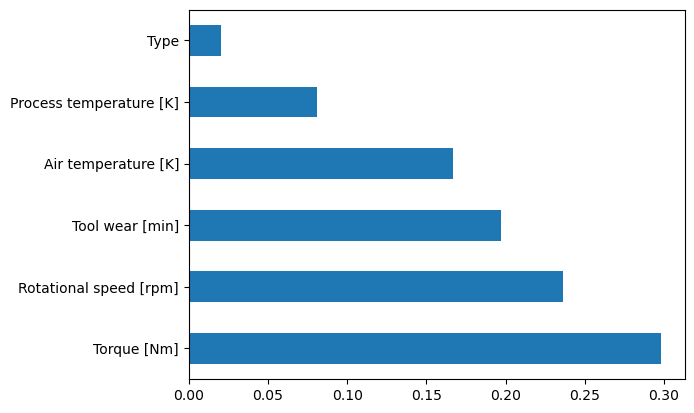

In [51]:
# Decision Tress
from sklearn import tree
# choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=20, criterion='entropy')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train, y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from slearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

### Random Forest

RandomForestClassifier(max_depth=20, n_estimators=200)
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2901
           1       0.93      0.56      0.70        25
           2       0.77      0.45      0.57        22
           3       0.95      0.67      0.78        27
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        18

    accuracy                           0.98      3000
   macro avg       0.61      0.45      0.51      3000
weighted avg       0.97      0.98      0.98      3000

[[2900    0    0    1    0    0]
 [  11   14    0    0    0    0]
 [  11    1   10    0    0    0]
 [   7    0    2   18    0    0]
 [   7    0    0    0    0    0]
 [  17    0    1    0    0    0]]
Accuracy of the model on Testing Sample Data: 0.98

Accuracy values for 10-fold Cross Validation:
 [0.92339685 0.97339678 0.97148909 0.97109866 0.9693624  0.96963051
 0.97904418 0.96393333 0.9773246  0.9

<Axes: >

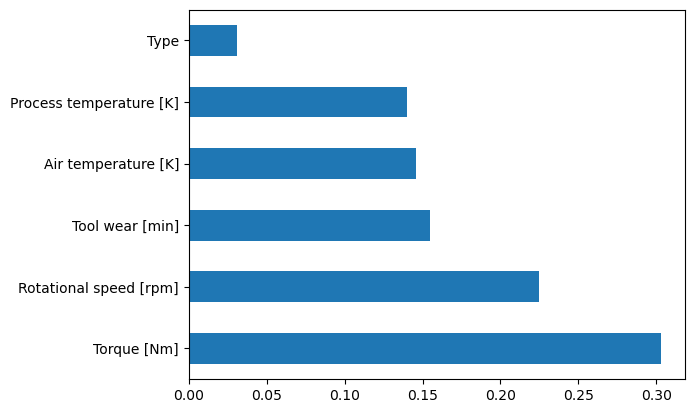

In [57]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
# Choose different hyperparameter values of max_depth, n_estimators and criterion to tune the model
clf = RandomForestClassifier(max_depth=20, n_estimators=200, criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train, y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

### AdaBoost

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.01, n_estimators=100)
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2901
           1       0.00      0.00      0.00        25
           2       0.67      0.36      0.47        22
           3       1.00      0.15      0.26        27
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        18

    accuracy                           0.97      3000
   macro avg       0.44      0.25      0.29      3000
weighted avg       0.95      0.97      0.96      3000

[[2899    0    2    0    0    0]
 [  25    0    0    0    0    0]
 [  12    2    8    0    0    0]
 [  21    0    2    4    0    0]
 [   7    0    0    0    0    0]
 [  18    0    0    0    0    0]]
Accuracy of the model on Testing Sample Data: 0.96

Accuracy values for 10-fold Cross Validation
 [0.95860534 0.95256057 0.9524116

<Axes: >

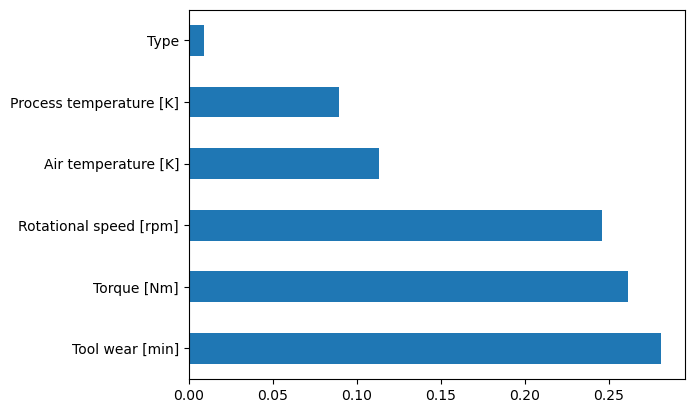

In [58]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=3)
clf = AdaBoostClassifier(n_estimators=100, base_estimator=DTC, learning_rate=0.01)

# Printing all the parameters of AdaBoost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train, y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-fold cross validation on a given algorithm
# Passing full data X and y because the k-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(AB, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:\n', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

### XGBoost

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2901
           1       0.88      0.92      0.90        25
           2       0.79      0.86      0.83        22
           3       0.83   

<Axes: >

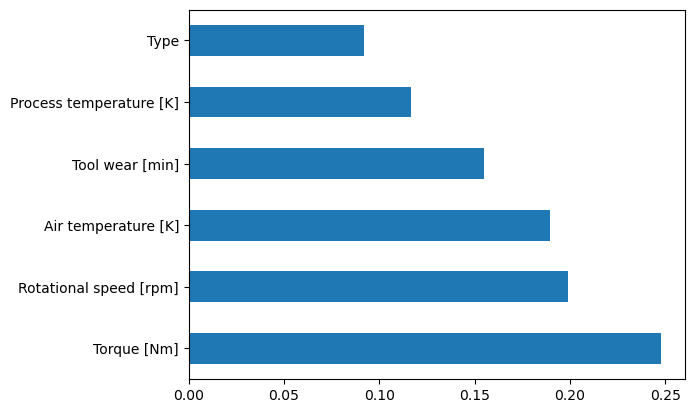

In [59]:
# Xtreme Gradient Boosting (XGBoost)
!pip install xgboost

from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=4, learning_rate=0.1, n_estimators=200, objective='binary:logistic', booster='gbtree')

# Printing all the parameters of XgBoost
print(clf)

# Creating the modelon Training Data
XGB=clf.fit(X_train, y_train)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(XGB, X, y, cv=10, scoring='f1_weighted')
print('\Accuarcy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

### KNN

In [60]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=4)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train, y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(KNN, X, y,cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold cross validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN

KNeighborsClassifier(n_neighbors=4)
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2901
           1       0.00      0.00      0.00        25
           2       0.38      0.23      0.29        22
           3       0.78      0.26      0.39        27
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        18

    accuracy                           0.97      3000
   macro avg       0.36      0.25      0.28      3000
weighted avg       0.95      0.97      0.96      3000

[[2895    1    3    2    0    0]
 [  23    0    2    0    0    0]
 [  17    0    5    0    0    0]
 [  17    0    3    7    0    0]
 [   7    0    0    0    0    0]
 [  18    0    0    0    0    0]]
Accuracy of the model on Testing Sample Data: 0.96

Accuracy values for 10-fold cross validation:
 [0.95474465 0.95245186 0.95848226 0.95304808 0.96071205 0.95348858
 0.95407935 0.95486517 0.95468365 0.95072876]

Final Ave

### Support Vector Machines

In [61]:
# Support Vector Machines(SVM)
!pip install svm

from sklearn import svm
clf = svm.SVC(C=20, kernel='rbf', gamma=0.01)

# Printing all the parameters of SVM
print(clf)

# Creating the model on Training Data
SVM=clf.fit(X_train, y_train)
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation on a given algorithm
# Passing full data X and y because the k-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(SVM, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\Final Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_works only for linear kernel

%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predcitors)
#feature_importances.nlargest(10).plot(kind='barh')

SVC(C=20, gamma=0.01)
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2901
           1       0.11      0.12      0.12        25
           2       0.47      0.36      0.41        22
           3       0.67      0.30      0.41        27
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        18

    accuracy                           0.96      3000
   macro avg       0.37      0.29      0.32      3000
weighted avg       0.95      0.96      0.95      3000

[[2855   24    7    4    6    5]
 [  21    3    1    0    0    0]
 [  14    0    8    0    0    0]
 [  18    0    1    8    0    0]
 [   7    0    0    0    0    0]
 [  18    0    0    0    0    0]]
Accuracy of the model on Testing Sample Data: 0.95

Accuracy values for 10-fold Cross Validation:
 [0.95950684 0.95186929 0.9557554  0.94527848 0.95507001 0.94595072
 0.95696895 0.94743315 0.95697113 0.9564633 ]
\Final Average Accuracy 

In [62]:
# Measure the time taken by each cell
import time
T1=time.time()

print('hello')
print('bye')

T2=time.time()
T2-T1

hello
bye


0.0010004043579101562

### Deployment of the Model

Based on the above trials you select that algorithm which produces the best average accuracy. In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them. 

I am choosing <b>XGBoost</b> as the final model since it is very fast for this data!

In order to deploy the model we follow below steps
1. Train the model using 100% data available
2. Save the model as a serialized file which can be stored anywhere
3. Create a python function which gets integrated with front-end(Tableau/Java Website etc.) to take all the inputs and returns the prediction

### Choosing the most importnat variables

Its beneficial to keep lesser number of predictors for the model while deploying itin production. The lesser predictors you keep,
the better because, the model will be less dependent hence, more stable.

This is important specially when the data is high dimensional(too many predictor columns).

'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'. As these are consistently
on top of the variable importance chart for every algorithm. Hence choosig these as final set of predcitor variables.

In [64]:
# Separate Target Variable and Predictor variables
TargetVariable='Failure Type'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data MinMax Normalization produced better results

# Choose between standardization and MinMax normalization
# PredictorScalar=StandardScalar()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(10000, 6)
(10000,)



### Step 1. Retraining the model using 100% data

In [65]:
# XGBoost
from xgboost import XGBClassifier
#choose from different tunable hyper parameter
clf=XGBClassifier(max_depth=4, learning_rate=0.1, n_estimators=200, objective='binary:logistic', booster='gbtree')

# Training the model on 100% Data available
FinalXGBoostModel=clf.fit(X,y)

### Cross validating the final model accuracy with less predictors

In [66]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuarcy_Values=cross_val_score(FinalXGBoostModel, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.95950684 0.95186929 0.9557554  0.94527848 0.95507001 0.94595072
 0.95696895 0.94743315 0.95697113 0.9564633 ]

Final Average Accuracy of the model: 0.95


### Step 2. Save the model as a serialized file which can be stored anywhere

In [67]:
import pickle
import os

# Saving the python objects as serialized files can be done using pickle library
# Here let is save the Final model
with open ('FinalXGBoostModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalXGBoostModel, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:', os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\Lenovo\ALL Python ML notebooks\Machine Predictive Maintenance Classification


### Step 3. Create a python function

In [68]:
# This Function can be called from any from any front end tool/website
def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    
    # Making sure the input data has same columns as itwas used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=pd.concat([DataForML, InputData])
    
    # PredictorScalerFit.fit(DataForML[Predictors])
    
    # Converting the binary nominal variable to numeric if any:
    InputData['Type'].replace({'L':1, 'M':2, 'H':3}, inplace=True)
    
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
    
    # Maintaining the same order of the columns as it was during the model training
    Predictors=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
    
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the function from pickle file
    import pickle
    with open('FinalXGBoostModel.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        # fileReadStream.close()
        
    # Generating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Predicted Status'])
    return(PredictionResult)

In [91]:
# Calling the function for some new cases

import pandas as pd

NewSampleData = pd.DataFrame(
    data=[[2, 300.8, 309.4, 1342, 62.4, 113],
          [3, 298.3, 308.1, 1412, 52.3, 218]],
    columns=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]',
             'Torque [Nm]', 'Tool wear [min]'])

print(NewSampleData)

# Calling the function for prediction
FunctionPredictResult(InputData=NewSampleData)

   Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     2                300.8                    309.4                    1342   
1     3                298.3                    308.1                    1412   

   Torque [Nm]  Tool wear [min]  
0         62.4              113  
1         52.3              218  


,Predicted Status
0,0
1,0


The Function FunctionPredictResult can be used to produce the predictions for one or more cases at a time. Hence, it can be scheduled using a batch job or cron job to run every night and generate predictions for all the available cases.

### Deploying a predictive model as an API
- Django and flask are two popular ways to deploy predictive models as a web service
- You can call your predictive models using a URL from any front end like tableau, java or angular js

### Creating the model with few parameters

### Function for predictions API

In [92]:
# Creating the function which can take inputs and return predictions
def FunctionGeneratePrediction(inp_Type, inp_Airtemperature, inp_Processtemperature, inp_Rotationalspeed, inp_Torque, inp_Toolwear):

    # Creating a data frame forthe model input
    SampleInputData=pd.DataFrame(
    data=[[inp_Type, inp_Airtemperature, inp_Processtemperature, inp_Rotationalspeed, inp_Torque, inp_Toolwear]],
    columns=['Type', 'Air temperature [K]', 'Processtemperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    
    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData=SampleInputData)
    
    # Returning the predictions
    return(Predictions.to_json())

# Function call
FunctionGeneratePrediction(inp_Type='M',
                             inp_Airtemperature=500,
                             inp_Processtemperature=500,
                             inp_Rotationalspeed=2000,
                             inp_Torque=100,
                             inp_Toolwear=150
                          )

'{"Predicted Status":{"0":0}}'